# Structure

# Introduction

In this Jupyter workbook I will walk through the process of synthesising a dataset using Python. The dataset will aim to simulate a real-world phenomenon across at least 100 different datapoints and at least 4 different variables. The challenge lies not only in understanding how to use Python and available packages to synthesise a dataset but also in gaining a deep understanding of the data this project aims to simulate.

The variables for which the datapoints are created will be investigated to determine their type and likely distributions and also how they relate to one-another to ensure a product that is as close to the real-life phenomenon as possible.

## General Considerations

One might ask: Why synthesise a dataset if I can simply go online to find data? A fairly straight-forward way to simulate a dataset could be to take an existing dataset, analyse its statistics and use the data on values, minimum, maximum, average, median, correlations and regressions to feed into a function that will either create the exact same dataset or randomise the dataset along the same base statistics. In fact, there are a number of Website and Apps which make this process easier.


However, researching different approaches on how to synthesise data brings forward many sources that are related to machine learning, deep learning and testing calculations as well as applications. Synthesised data can be used to test or develop applications in situations where collection of real data would delay development because of the time and resources it would require. (1) It is not difficult to imagine such a situation in a corporate environment. Furthermore, it can serve as a basis to train a machine learning algorithm on. (1, wikipedia)

[tbc]

Therefore, this project will attempt to model a dataset not recreating a specific already existing dataset but after assumptions and insights that were derived from researching the real-life-phenomenon.


(1) https://medium.com/@maxbendick/synthesizing-deep-learning-training-data-db100de1b7f0

## (Preliminary) Overview

This project will more specifically aim to synthesise a dataset around IQ score. It will aim to create a dataset of 100 datapoints, corresponding to 100 people across the variables: IQ, Gender, Age and Income.

# Real-life phenomenon: IQ Score

IQ, Intelligence Quotient, lends itself fabulously to an exploration for a data scientist. It is a well-researched area, with a lot of studies to draw inspiration as well as data from. The name itself suggests its mathematical nature and statistics plays a significant role in the field of psychology. 

IQ is not the same as intelligence, even though a point can be made that both are closely correlated. While intelligence refers to ___ the IQ of a person is the result they scored at a specific point in time and cannot be assigned without an IQ test. (1) There is no one IQ test and the tests conducted can vary depending on the underlying definition of intelligence, which has sparked discussions around the validity of the tests. (2) While certainly an interesting field of study, this project is does not aim to discuss the validity of IQ but is more concerned with the scores and how studies have suggested correlations with other areas of life.

(1)https://books.google.ie/books?id=2G34CgAAQBAJ&pg=PA210&dq=what+is+IQ+psychology+introduction&hl=de&sa=X&ved=0ahUKEwiW8I-LzIvfAhXOUBUIHW0MAUQQ6AEIVDAH#v=onepage&q=what%20is%20IQ%20psychology%20introduction&f=false, 210

(2)https://books.google.ie/books?id=gsqFAgAAQBAJ&pg=PT88&dq=what+is+IQ+psychology+introduction&hl=de&sa=X&ved=0ahUKEwiW8I-LzIvfAhXOUBUIHW0MAUQQ6AEIWzAI#v=onepage&q=what%20is%20IQ%20psychology%20introduction&f=false, chapter 7



# The Variables

A big part of the appeal of determining people's IQ score is to see if it stands in relation to other attributes of a person's life. Researchers have found a number of interesting connections, [this article](https://www.vox.com/2016/5/24/11723182/iq-test-intelligence) displays only some of them. For example:

> Having a higher IQ protects you from death

> IQ is correlated with career success and wealth, but not necessarily happiness

> You're probably stuck with what you got

While often a heated discussion, latest data suggests that men and women show no significant difference in IQ scores overall. (1)

(1) https://www.psychologytoday.com/us/blog/beautiful-minds/201207/men-women-and-iq-setting-the-record-straight

## Putting the findings into practise


Considering the vast amount of information around IQ it seems tangible to model a realistic dataset of 100 people around their IQ score. Python has in-built commands and available packages that allow to quickly produce random numbers. See also my previous assignment on the functionalities of the numpy.random package. The following is a quick demonstration of how these functions can be used to create a dataset:

In [62]:
#The following code uses numpy and pandas to generate random values that can be put and displayed as a pandas dataframe
import pandas as pd
import numpy as np

#creating empty lists for the different columns
listIQ = []
listAge = []
listIncome = []
listGender = []

#determining size of the dataset/lists
p = 1000

#assuming IQ values can fall between 65 and 150 and appending the random value to the IQ list
for i in range(p):
    x = np.random.randint(65,150)
    listIQ.append(x)

#assuming an age range between which the IQ test could have been taken
for i in range(p):
    x = np.random.randint(5,90)
    listAge.append(x)

#assuming an income range
for i in range(p):
    x = np.random.randint(15000,55000)
    listIncome.append(x)

    #gender
for i in range(p):
    gender = ['m', 'w']
    x = np.random.choice(gender)
    listGender.append(x)

#pull data together
#see pandas documentation:
#https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.html
d = {'IQ': listIQ, 'Age': listAge, 'Income': listIncome, 'Gender': listGender}
df = pd.DataFrame(data=d)
print(df)

df.corr()

      IQ  Age  Income Gender
0    115   40   19986      w
1     78   65   45369      w
2     89    8   48067      w
3    116   85   32081      w
4    140   74   22991      m
5    119   62   53191      m
6    101   37   15645      w
7     76   52   42457      m
8     97   35   26853      w
9     98   80   31969      m
10    98   13   35264      w
11    68   73   40759      m
12    66   58   41153      m
13   126   89   31402      w
14   124    6   33470      m
15    95   81   31406      w
16    88   50   21054      m
17   109   63   33119      m
18   134    9   15742      m
19    73   77   51488      m
20   107   25   30794      w
21    98   18   36727      w
22    75   66   19570      m
23    99   69   27323      m
24   110   44   46418      m
25   101   80   30274      w
26   105   28   24332      m
27    82   42   51921      w
28   144   13   40541      w
29   114   20   37112      m
..   ...  ...     ...    ...
970  122   41   43386      m
971  134   56   16842      m
972  142   81 

,IQ,Age,Income
IQ,1.000000,0.027777,-0.035853
Age,0.027777,1.000000,-0.002023
Income,-0.035853,-0.002023,1.000000


However, even if generating the dataset a few times over, a flaw with this method emerges: While it does reliably generate numbers within the specified limits, there is no consistency. The Correlations between the values can change dramatically and it is difficult to draw meaningful conclusions from the dataset. It is unusable for simulation purposes.A look at the graphs below explains why. As per the design of the commands in numpy, the samples were drawn from uniform distributions, meaning, that every outcome is equally likely to occur. While this is arguably acceptable for the variable of Gender in the dataset, it has been established that many natural phenomena, such as height and also IQ resemble a normal or Gaussian distribution.

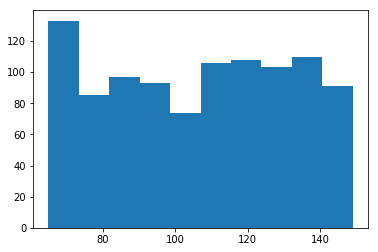

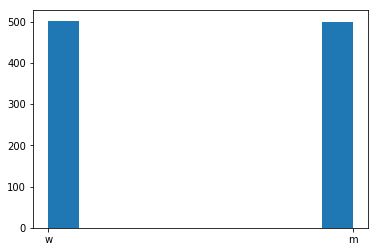

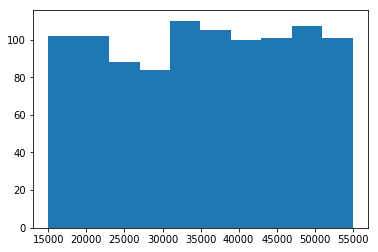

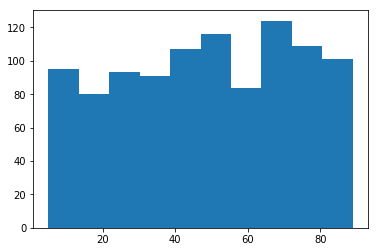

In [70]:
import matplotlib.pyplot as plt

plt.hist(listIQ)
plt.show()
plt.hist(listGender)
plt.show()
plt.hist(listIncome)
plt.show()
plt.hist(listAge)
plt.show()

Compare the above graphs to the "bell curve" that is characteristic of the normal distribution:

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/39/IQ_distribution.svg/2000px-IQ_distribution.svg.png" width="420">
Normalized IQ distribution with mean 100 and standard deviation 15 (1).

The distribution of age looks very different again: 
<img src="https://www.indexmundi.com/graphs/population-pyramids/ireland-population-pyramid-2016.gif" width="420">
Population pyramid, Ireland 2016 (2)

(1) https://en.wikipedia.org/wiki/Intelligence_quotient
(2) https://www.indexmundi.com/ireland/age_structure.html